## Importing packages

In [64]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
# install_all_packages()
load_library_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

[[32]]
[1] TRUE

[[33]]
[1] TRUE

[[34]]
[1] TRUE

[[35]]
[1] TRUE

[[36]]
[1] TRUE

[[37]]
[1] TRUE

[[38]]
[1] TRUE

[[39]]
[1] TRUE

[[40]]
[1] TRUE

[[41]]
[1] TRUE

## Clustering - Kmodes Silhoette

In [65]:
df_during_facilitators_dist <- distinct(df_during_facilitators)
nrow(df_during_facilitators_dist)

[1] 50

In [66]:
df_matrix <- data.matrix(df_during_facilitators_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_facilitators_dist) - similarity_matrix
head(dissimilarity_matrix)

0,2,1,2,4,1,2,1,3,2,...,2,3,3,3,3,4,5,4,1,2
2,0,3,2,4,3,2,1,1,2,...,4,3,3,3,3,4,5,2,3,4
1,3,0,3,3,2,3,2,4,1,...,3,2,2,2,4,5,4,3,2,1
2,2,3,0,2,3,2,1,3,2,...,2,5,3,3,5,2,3,4,3,4
4,4,3,2,0,3,2,3,3,2,...,2,5,3,3,5,2,1,4,5,4
1,3,2,3,3,0,1,2,2,3,...,1,4,4,4,2,3,4,5,2,3


### Silhoette 
<hr />

In [67]:
df_matrix <- data.matrix(df_during_facilitators_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_facilitators_dist) - similarity_matrix
head(dissimilarity_matrix)

0,2,1,2,4,1,2,1,3,2,...,2,3,3,3,3,4,5,4,1,2
2,0,3,2,4,3,2,1,1,2,...,4,3,3,3,3,4,5,2,3,4
1,3,0,3,3,2,3,2,4,1,...,3,2,2,2,4,5,4,3,2,1
2,2,3,0,2,3,2,1,3,2,...,2,5,3,3,5,2,3,4,3,4
4,4,3,2,0,3,2,3,3,2,...,2,5,3,3,5,2,1,4,5,4
1,3,2,3,3,0,1,2,2,3,...,1,4,4,4,2,3,4,5,2,3


#### Scanning parameters


In [68]:
source(here('Modules','modules.R'))
dists <- c("cosine", "jaccard", "hamman", "simple matching", "faith")
thetas <- linspace(0, 0.99, 15)
nt <- length(thetas)
nd <- length(dists)
nk <- nrow(distinct(df_during_facilitators))
scs <- c()
# for (t in thetas) {
#     for (d in dists){
#         for (k in 2:nk) {
#             sc <- silhouette_values_rock(
#                 num_clusters = k,
#                 theta = t,
#                 df = df_during_facilitators_dist,
#                 distmethod = d,
#                 diss_matrix = dissimilarity_matrix)[[1]]
#             scs <- append(scs, sc)
#         }
#     }
# }


In [69]:
# ks_by_theta <- data.frame(
#     theta=rep(thetas, each=((nk-1)*nd)), 
#     dist=rep(rep(dists, each=(nk-1)), nt), 
#     k=rep(2:nk, nd*nt), scs=scs
# )

# write.csv(
#     ks_by_theta,
#     "../../../Data/silhouette_rock_facilitators.csv", row.names = FALSE
# )

####  Best Situations

In [70]:
scs <- read.csv("../../../Data/silhouette_rock_facilitators.csv")
scs %>% group_by(dist) %>% slice(which.max(scs))

theta,dist,k,scs
<dbl>,<chr>,<int>,<dbl>
0.1414286,cosine,15,0.27551969
0.2121429,faith,8,0.27622018
0.0000000,hamman,6,0.06613642
0.1414286,jaccard,15,0.27551969
0.3535714,simple matching,14,0.20897274


In [71]:
best_situtation <- scs[scs['scs'] == max(scs['scs']), ]
best_situtation

,theta,dist,k,scs
,<dbl>,<chr>,<int>,<dbl>
938,0.2121429,faith,8,0.2762202


In [72]:
best_theta_rock <- best_situtation[1, 'theta']
best_dist_rock <- best_situtation[1, 'dist']
best_K_rock <- best_situtation[1, 'k']

#### Evaluating the silhuette coefficient for best seed

In [73]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() + 
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [74]:
# silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

In [75]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

## Exploring Kmodes best k

In [76]:
df_during_facilitators_dist$cluster <-rockCluster(df_matrix, n=best_K_rock, theta=best_theta_rock, fun = "dist", funArgs = list(method=best_dist_rock))$cl
head(df_during_facilitators_dist)

Clustering:
computing distances ...
computing links ...
computing clusters ...


,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group,cluster
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,1,0,0,0,1,0,1
2,0,0,0,0,0,0,1
3,1,1,0,0,1,0,2
4,0,0,0,0,1,1,3
5,0,1,1,0,1,1,4
6,1,0,1,0,1,0,5


In [77]:
joint <- c(
    'PA_easiness_outdoor_activities'='PA_easiness_outdoor_activities',
    'PA_easiness_professional_guidance' = 'PA_easiness_professional_guidance',
    'PA_easiness_music' = 'PA_easiness_music',
    'PA_easiness_others' = 'PA_easiness_others',
    'PA_facilitator_home' = 'PA_facilitator_home',
    'PA_facilitator_group' = 'PA_facilitator_group'
)

df_during_facilitators <- left_join(df_during_facilitators, df_during_facilitators_dist, by = joint)
df_during$cluster <- df_during_facilitators$cluster
nrow(df_during_facilitators)

[1] 1215

In [78]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8 
165 201  79 122 394 123  62  69 

### Profile Plots
<hr />

In [79]:
colors <- c("pink1", "violet", "mediumpurple1", "slateblue1", "purple", "purple3",
        "turquoise2", "skyblue", "steelblue", "blue2", "navyblue",
        "orange", "tomato", "coral2", "palevioletred", "violetred", "red2",
        "springgreen2", "yellowgreen", "palegreen4",
        "wheat2", "tan", "tan2", "tan3", "brown",
        "grey70", "grey50", "grey30")

#### Practice of Exercise 

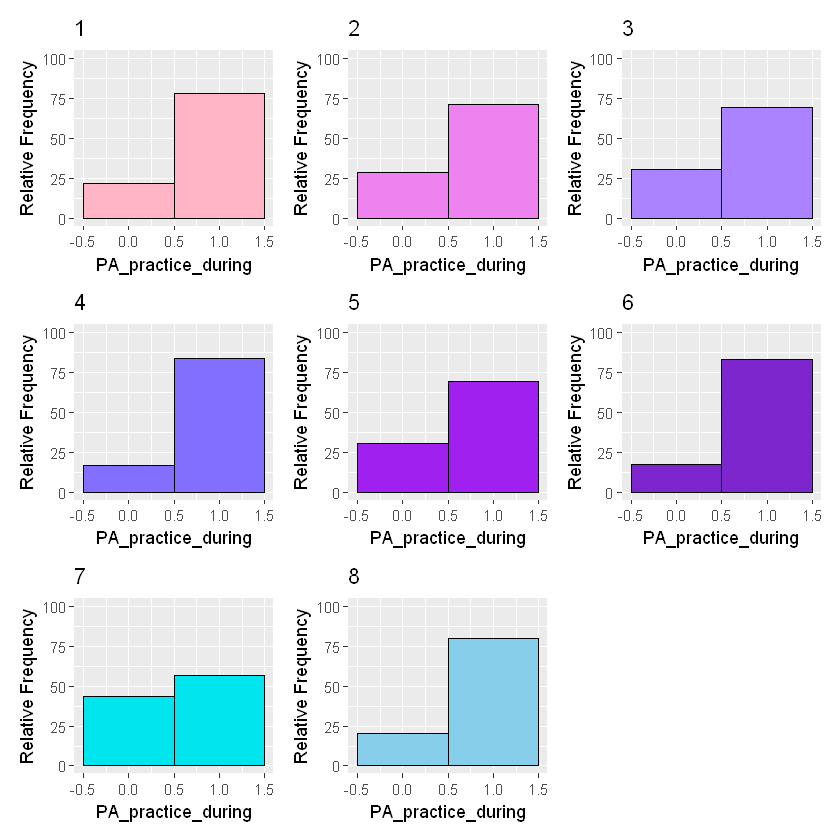

In [80]:


myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_practice_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_practice_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100)  
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Sedentary Behavior

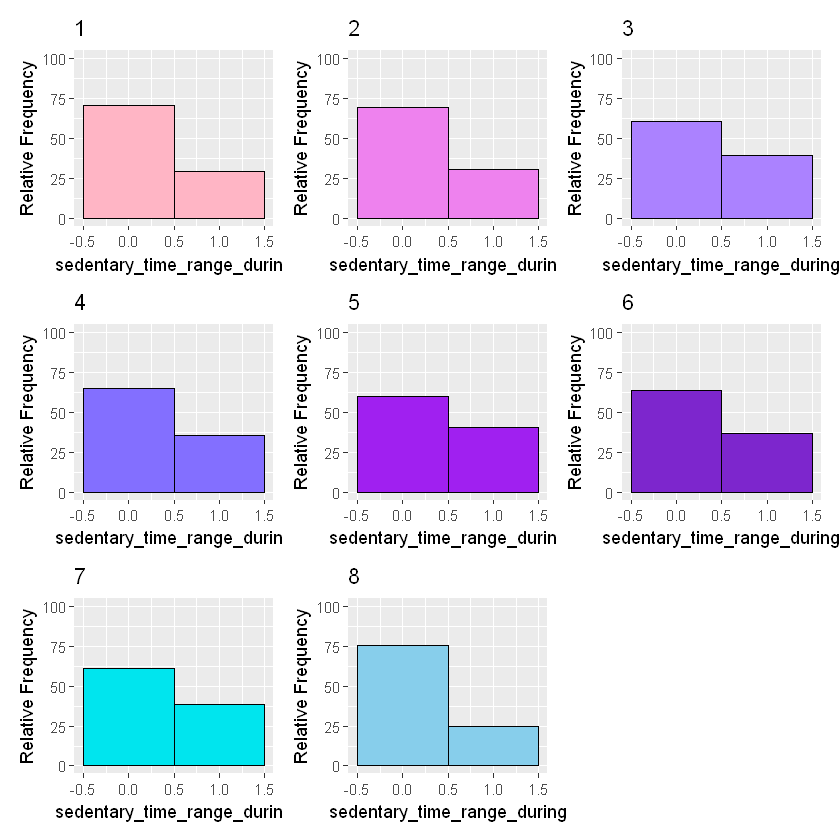

In [81]:


myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sedentary_time_range_during))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sedentary_time_range_during, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)


#### Exercise Intensity

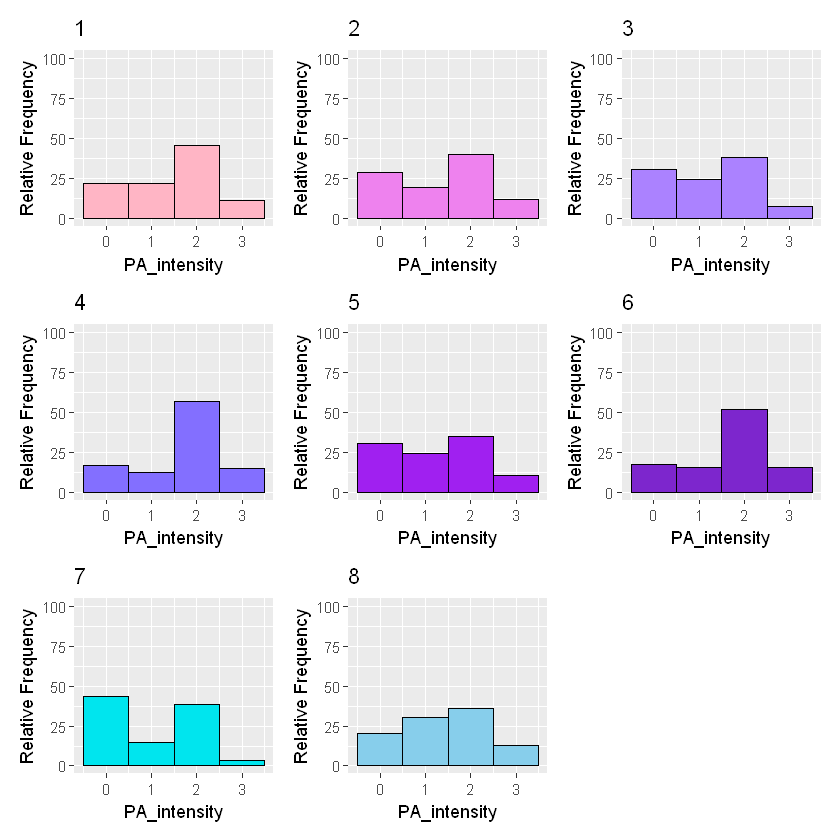

In [82]:
myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_intensity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_intensity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Duration

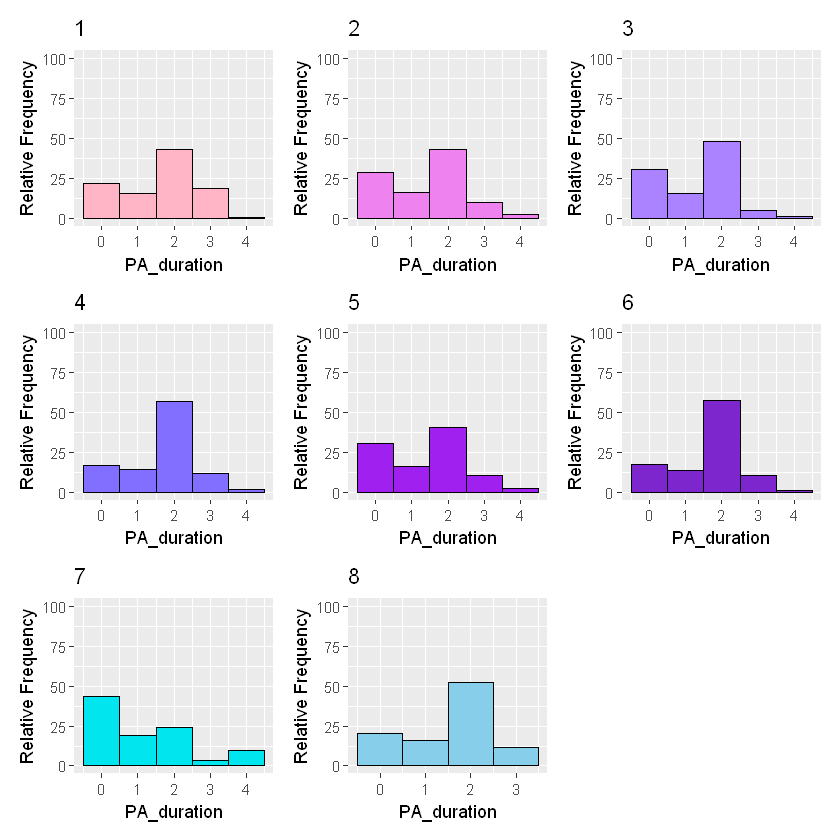

In [83]:
myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_duration))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_duration, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Exercise Weekly Frequency

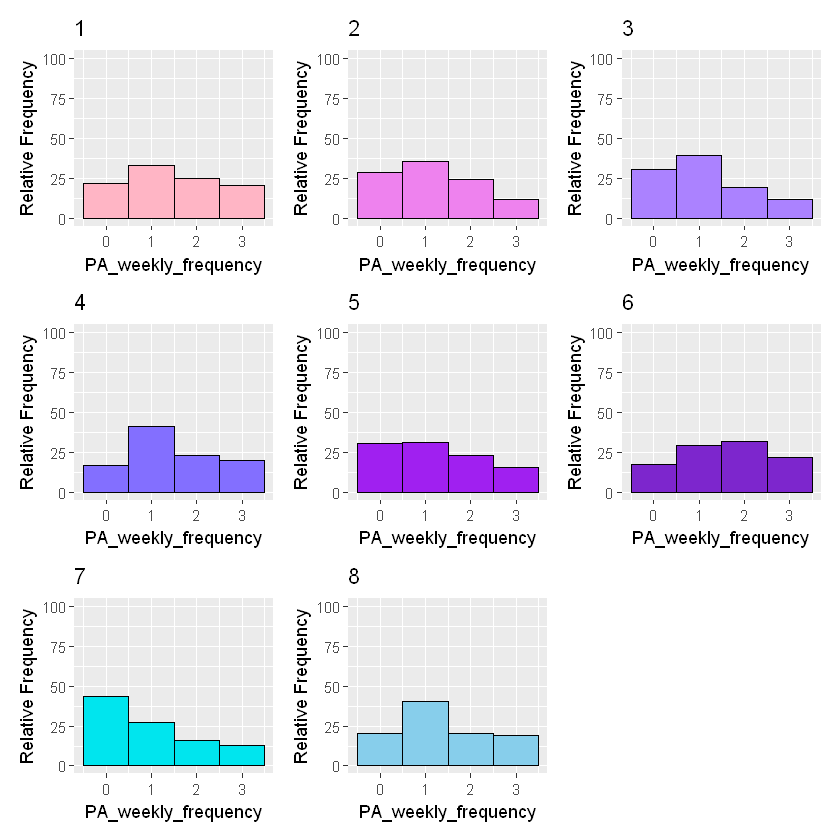

In [84]:

myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$PA_weekly_frequency))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=PA_weekly_frequency, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Income Range

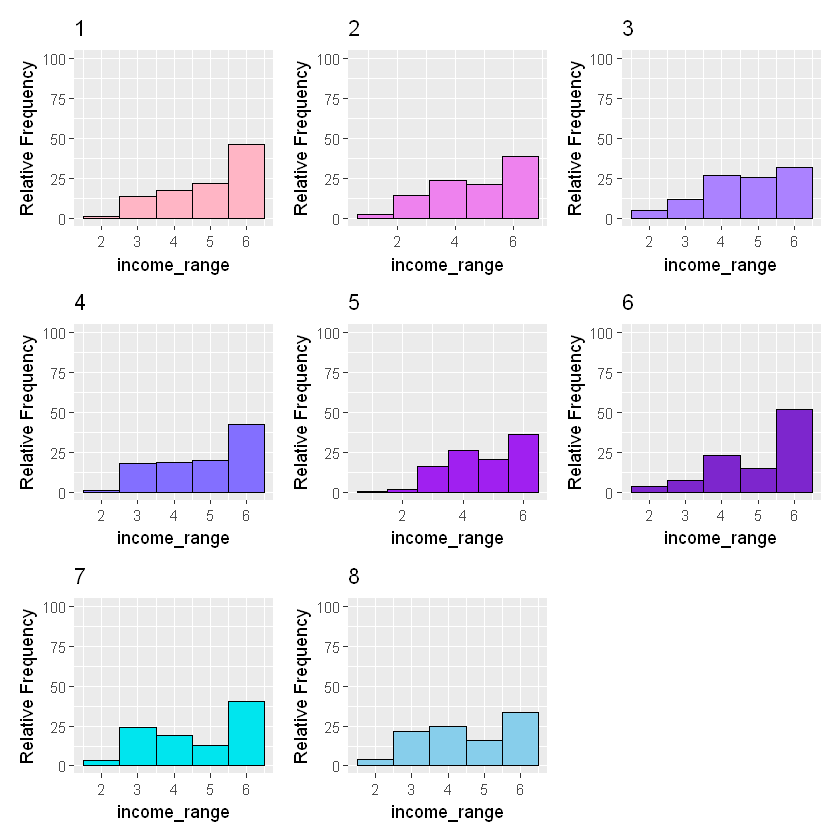

In [85]:

myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$income_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=income_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Age Range

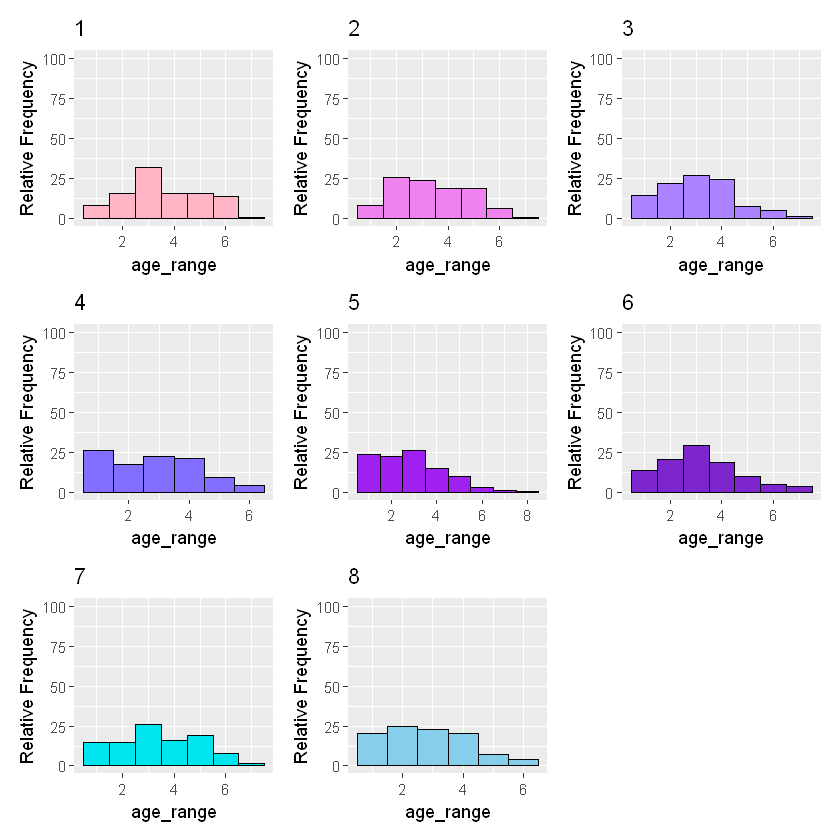

In [86]:


myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$age_range))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=age_range, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Sex

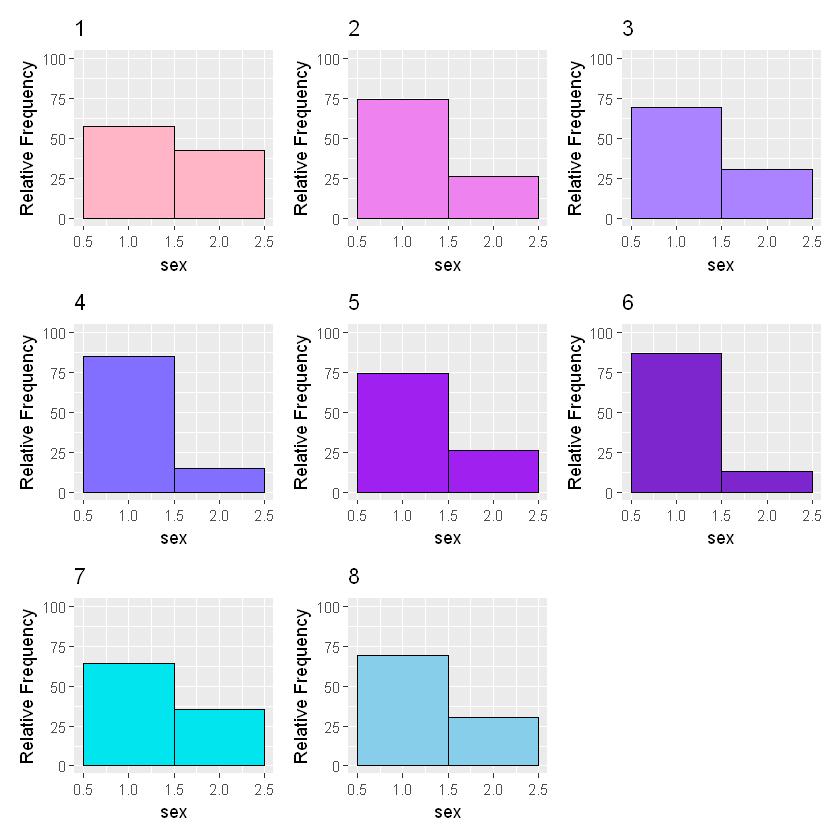

In [87]:


myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$sex))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=sex, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)



#### Scholarity

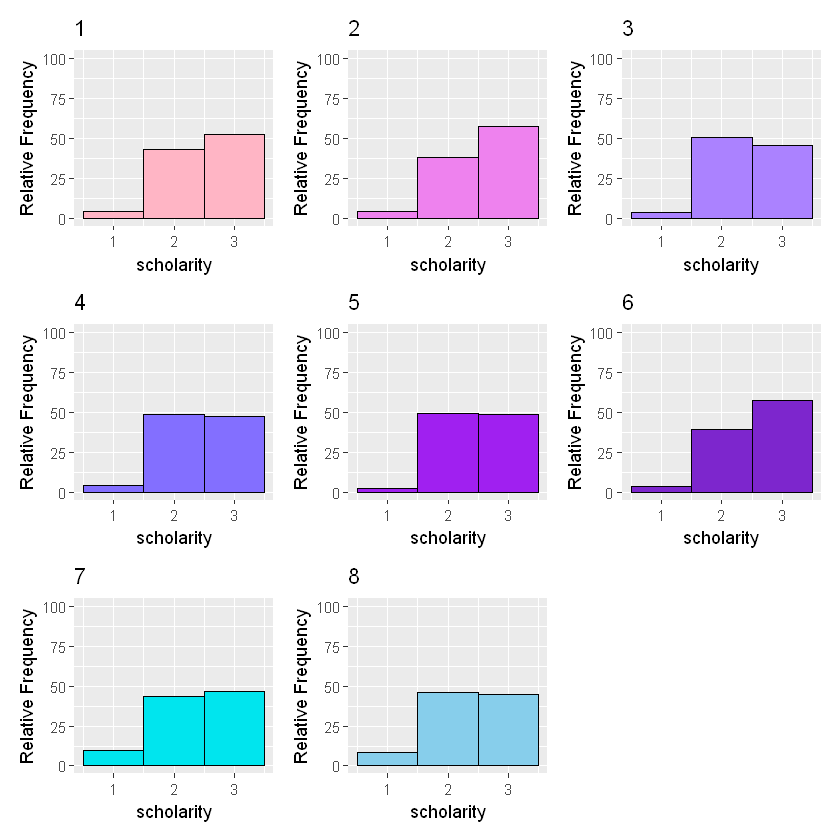

In [88]:


myplots <- list()

for(cl in 1:best_K_rock){
  dist_values = length(unique(df_during[df_during$cluster == cl,]$scholarity))
  plt <- ggplot() + geom_histogram( 
          color='black',
          data=df_during[df_during$cluster == cl,], 
          aes(x=scholarity, y=..count../sum(..count..)*100),
          fill=colors[cl],
          bins = dist_values,
          position=position_dodge()
        ) + ylab("Relative Frequency")+ ggtitle(cl) + ylim(0, 100) 
  myplots[[cl]] <- plt 
}


wrap_plots(myplots)

#### Mode

In [91]:
modes <- data.frame(matrix(ncol = ncol(df_during_facilitators_dist)-1, nrow = 0))
colnames(modes) <- colnames(df_during_facilitators_dist)[1:ncol(df_during_facilitators_dist)-1]
for( cl in unique(df_during_facilitators_dist$cluster)){
    cl_mode <- unname(apply(df_during_facilitators_dist[df_during_facilitators_dist$cluster == cl, ], 2, modefunc))
    modes[nrow(modes) + 1,] <- cl_mode[1:length(cl_mode)-1]
}

modes

,PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0
2,1,1,1,0,0,0
3,0,0,0,0,0,1
4,0,1,0,0,1,1
5,0,1,1,0,1,0
6,1,1,0,1,1,0
7,0,0,0,1,1,0
8,0,0,1,0,0,1
